In [74]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


from scipy import signal
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [75]:
eyes_open_time_data1 = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_open.csv", thousands=',')
eyes_open_time_data2 = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_open2.csv", thousands=',')
eyes_closed_time_data1 = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_closed.csv", thousands=',')
eyes_closed_time_data2 = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_closed2.csv", thousands=',')

#eyes_open_time_data = eyes_open_time_data1.append(eyes_open_time_data2)
#eyes_closed_time_data = eyes_closed_time_data1.append(eyes_closed_time_data2)

eyes_open_time_data = eyes_open_time_data1
eyes_closed_time_data = eyes_closed_time_data1

eyes_closed_time_data2.head()

,Channel,10-20,ChannelGroup,Volts,TimeStamp
0,1,P4,0,0.000002,506042
1,2,POz,0,0.000003,506042
2,3,PO4,0,0.000002,506042
3,4,O2,0,-0.000001,506042
4,5,O1,0,0.000004,506042


In [76]:
fs = 250.0
lowcut = 5.0
highcut = 15.0

filtered_eyes_open_channel_data = pd.DataFrame([])
channel_group_data = eyes_open_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs, order=2)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_open_channel_data = filtered_eyes_open_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_open_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']


filtered_eyes_closed_channel_data = pd.DataFrame([])
channel_group_data2 = eyes_closed_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data2:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs, order=2)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_closed_channel_data = filtered_eyes_closed_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_closed_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']

filtered_eyes_closed_channel_data

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,0,-0.0,320580,-1.613954e-09
1,1,P4,1,-0.000001,320584,-1.705260e-08
2,1,P4,2,-0.000001,320588,-6.882541e-08
3,1,P4,3,-0.000002,320592,-1.695006e-07
4,1,P4,4,-0.000002,320596,-3.089129e-07
...,...,...,...,...,...,...
14956,8,P3,14956,-0.000005,380301,-4.774403e-06
14957,8,P3,14957,-0.000004,380305,-4.765498e-06
14958,8,P3,14958,-0.000002,380309,-4.367929e-06
14959,8,P3,14959,-0.000001,380313,-3.588392e-06


In [77]:
channel_group_data_eyes_open = filtered_eyes_open_channel_data.groupby(['ChannelGroup'])
channel_group_data.head()

channel_group_data_eyes_closed = filtered_eyes_closed_channel_data.groupby(['ChannelGroup'])
channel_group_data.head()

,Channel,10-20,ChannelGroup,Volts,TimeStamp
0,1,P4,0,1.068917e-06,74412
1,2,POz,0,-1.271987e-06,74412
2,3,PO4,0,-5.881603e-06,74412
3,4,O2,0,1.942212e-06,74412
4,5,O1,0,-9.305232e-06,74412
5,6,Oz,0,-5.158740e-06,74412
6,7,PO3,0,-2.025073e-06,74412
7,8,P3,0,3.968358e-07,74412
8,1,P4,1,4.816182e-08,74416
9,2,POz,1,-4.398890e-07,74416


In [78]:
period_data_eyes_open = []

period_data_eyes_open = grouper(channel_group_data_eyes_open, 100)
channels_grouped_100_eyes_open = list(period_data_eyes_open)[:-1]

channels_grouped_100_eyes_open[0][0]


period_data_eyes_closed = []

period_data_eyes_closed = grouper(channel_group_data_eyes_closed, 100)
channels_grouped_100_eyes_closed = list(period_data_eyes_closed)[:-1]

channels_grouped_100_eyes_closed[0][0]

(0,
   Channel 10-20 ChannelGroup     Volts TimeStamp  Filtered Volts
 0       1    P4            0      -0.0    320580   -1.613954e-09
 0       2   POz            0       0.0    320580    4.458249e-09
 0       3   PO4            0  0.000001    320580    1.814752e-08
 0       4    O2            0  0.000002    320580    2.279500e-08
 0       5    O1            0       0.0    320580    2.145388e-09
 0       6    Oz            0 -0.000001    320580   -7.040648e-09
 0       7   PO3            0  0.000007    320580    1.001413e-07
 0       8    P3            0       0.0    320580    2.494685e-09)

In [79]:
cwt_data_eyes_open2 = []
cwt_labels_eyes_open = []
widths = np.linspace(1.0, 15.0, 100);

for period_group in channels_grouped_100_eyes_open:
    #remove tuple ranking
    period_group_cleaned = [item[1] for item in period_group]
    period_channel_groups = pd.DataFrame([])
    
    #make a master df of all channels for this period
    for channel_group in period_group_cleaned:
        channel_group_df = pd.DataFrame(channel_group)
        period_channel_groups = period_channel_groups.append(channel_group_df)
    
    #group df by channel, each having 100 measures
    channels = period_channel_groups.groupby(['Channel'])
        
    all_channels_cwt_flattened = []
        
    #cwt 100 measures and flatten result to 10000 measures
    for name, channel in channels:
        flattened_volts = []
        for row in channel.iterrows():
            flattened_volts.append(row[1]['Filtered Volts'])
            
        npsig = np.fromiter(flattened_volts, float)
        row_cwt = signal.cwt(npsig, signal.ricker, widths)
        row_cwt_flattened = row_cwt.flatten()
        
        all_channels_cwt_flattened = all_channels_cwt_flattened + list(row_cwt_flattened)
        
    cwt_labels_eyes_open.append(name)
    cwt_data_eyes_open2.append(all_channels_cwt_flattened)
    
pd.DataFrame(cwt_data_eyes_open2)



cwt_data_eyes_closed2 = []
cwt_labels_eyes_closed = []
widths = np.linspace(1.0, 15.0, 100);

for period_group in channels_grouped_100_eyes_closed:
    #remove tuple ranking
    period_group_cleaned2 = [item[1] for item in period_group]
    period_channel_groups2 = pd.DataFrame([])
    
    #make a master df of all channels for this period
    for channel_group in period_group_cleaned2:
        channel_group_df = pd.DataFrame(channel_group)
        period_channel_groups2 = period_channel_groups2.append(channel_group_df)
    
    #group df by channel, each having 100 measures
    channels2 = period_channel_groups2.groupby(['Channel'])
        
    all_channels_cwt_flattened2 = []
        
    #cwt 100 measures and flatten result to 10000 measures
    for name, channel in channels2:
        flattened_volts = []
        for row in channel.iterrows():
            flattened_volts.append(row[1]['Filtered Volts'])
            
        npsig = np.fromiter(flattened_volts, float)
        row_cwt = signal.cwt(npsig, signal.ricker, widths)
        row_cwt_flattened = row_cwt.flatten()
        
        all_channels_cwt_flattened2 = all_channels_cwt_flattened2 + list(row_cwt_flattened)
        
    cwt_labels_eyes_closed.append(name)
    cwt_data_eyes_closed2.append(all_channels_cwt_flattened)
    
pd.DataFrame(cwt_data_eyes_open2)

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,-2.551332e-08,6.263162e-09,7.617749e-08,1.320609e-07,1.369684e-07,9.080374e-08,1.050520e-08,-7.959581e-08,-1.558893e-07,-2.049411e-07,...,-5.343805e-06,-5.526645e-06,-0.000006,-0.000006,-0.000005,-5.165085e-06,-0.000005,-0.000004,-0.000004,-0.000003
1,1.611554e-06,2.884922e-06,5.611853e-07,-4.885622e-07,-5.615197e-07,-4.922729e-07,-4.052543e-07,-3.225445e-07,-2.521375e-07,-2.000453e-07,...,-1.803859e-05,-1.798522e-05,-0.000018,-0.000017,-0.000017,-1.602429e-05,-0.000015,-0.000014,-0.000013,-0.000012
2,-1.641905e-06,-6.948779e-06,-2.604711e-06,-1.647845e-07,2.846249e-07,4.658637e-07,5.929030e-07,6.751628e-07,7.164392e-07,7.153718e-07,...,1.368416e-05,1.637222e-05,0.000019,0.000021,0.000023,2.410123e-05,0.000025,0.000026,0.000026,0.000026
3,1.603583e-06,8.139620e-06,3.668081e-06,1.015847e-06,4.335012e-07,6.137244e-08,-3.153078e-07,-6.826408e-07,-1.013115e-06,-1.275979e-06,...,9.939192e-07,-3.753516e-07,-0.000002,-0.000003,-0.000004,-4.294596e-06,-0.000005,-0.000005,-0.000006,-0.000006
4,-6.876372e-08,2.197852e-06,1.395058e-06,7.868362e-07,6.185481e-07,4.612892e-07,2.608004e-07,1.983998e-08,-2.467756e-07,-5.129714e-07,...,-1.627267e-06,-2.237158e-06,-0.000003,-0.000003,-0.000004,-3.735801e-06,-0.000004,-0.000004,-0.000004,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2.850460e-06,9.133774e-06,3.619885e-06,4.362405e-07,-3.573843e-07,-8.455641e-07,-1.256871e-06,-1.565132e-06,-1.738558e-06,-1.761059e-06,...,2.926978e-05,2.896193e-05,0.000028,0.000027,0.000025,2.313698e-05,0.000021,0.000018,0.000016,0.000013
261,-5.165583e-07,-8.316118e-06,-3.816657e-06,-1.187236e-06,-8.107292e-07,-6.150758e-07,-3.484264e-07,-2.814321e-08,3.148047e-07,6.488849e-07,...,-2.579759e-05,-2.891890e-05,-0.000032,-0.000034,-0.000036,-3.710560e-05,-0.000038,-0.000038,-0.000038,-0.000038
262,-3.940951e-06,-1.158314e-05,-3.786467e-06,7.430413e-07,1.888146e-06,2.364182e-06,2.496834e-06,2.331538e-06,1.946429e-06,1.436239e-06,...,-1.511364e-05,-1.492157e-05,-0.000014,-0.000014,-0.000013,-1.195865e-05,-0.000011,-0.000010,-0.000008,-0.000007
263,2.099848e-07,-1.054759e-06,-8.784624e-07,-6.138395e-07,-4.426948e-07,-2.248736e-07,2.133571e-08,2.453815e-07,3.997536e-07,4.535502e-07,...,-1.404623e-05,-1.607259e-05,-0.000018,-0.000019,-0.000021,-2.181174e-05,-0.000023,-0.000023,-0.000023,-0.000023


In [19]:
pd.DataFrame(cwt_data_eyes_closed2)

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,2.266962e-08,5.431645e-08,8.275639e-08,8.077219e-08,3.278640e-08,-5.921769e-08,-1.754936e-07,-2.844035e-07,-3.596747e-07,-3.898988e-07,...,0.000002,2.604200e-07,-0.000002,-0.000004,-0.000005,-6.978284e-06,-8.474656e-06,-9.775288e-06,-1.085526e-05,-1.169702e-05
1,-1.471520e-06,-4.307662e-06,-1.645374e-06,-1.429003e-07,2.262692e-07,4.588666e-07,6.639131e-07,8.380472e-07,9.774413e-07,1.073251e-06,...,-0.000010,-8.228020e-06,-0.000006,-0.000004,-0.000003,-9.351991e-07,6.091254e-07,1.996398e-06,3.214710e-06,4.257311e-06
2,-1.687160e-06,2.361140e-06,2.123085e-06,1.733751e-06,1.733804e-06,1.615088e-06,1.332700e-06,9.320546e-07,4.695620e-07,-4.953078e-09,...,0.000006,6.224137e-06,0.000007,0.000007,0.000007,7.045743e-06,6.931022e-06,6.695315e-06,6.349085e-06,5.905896e-06
3,-9.223970e-08,-2.903210e-08,-1.062596e-07,-4.019788e-08,1.180397e-07,2.810269e-07,4.029405e-07,4.514046e-07,4.095143e-07,2.765664e-07,...,0.000009,1.008764e-05,0.000011,0.000012,0.000012,1.229128e-05,1.234792e-05,1.222142e-05,1.192394e-05,1.146989e-05
4,1.743365e-06,-4.564868e-07,-9.525401e-07,-1.079518e-06,-1.245088e-06,-1.328023e-06,-1.310407e-06,-1.195310e-06,-9.876954e-07,-7.026195e-07,...,0.000008,8.900335e-06,0.000010,0.000010,0.000011,1.099817e-05,1.101131e-05,1.084160e-05,1.050666e-05,1.002680e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,-9.087394e-07,-2.941771e-06,-1.259909e-06,-1.292546e-07,3.260777e-07,6.599824e-07,8.881606e-07,9.719706e-07,8.996102e-07,6.859044e-07,...,0.000010,8.463344e-06,0.000007,0.000006,0.000004,2.437193e-06,8.231102e-07,-7.310902e-07,-2.182201e-06,-3.494185e-06
548,2.404222e-07,-1.373007e-06,-3.017495e-07,1.014108e-07,-1.465726e-07,-4.802695e-07,-7.800814e-07,-9.900745e-07,-1.067645e-06,-9.957886e-07,...,-0.000018,-1.708534e-05,-0.000016,-0.000014,-0.000013,-1.094039e-05,-9.205424e-06,-7.455075e-06,-5.718494e-06,-4.022265e-06
549,-1.062936e-06,6.078432e-06,3.394842e-06,1.683984e-06,1.557322e-06,1.493012e-06,1.290293e-06,9.683677e-07,5.797656e-07,1.805765e-07,...,-0.000004,-7.099015e-06,-0.000010,-0.000014,-0.000016,-1.874428e-05,-2.075405e-05,-2.234162e-05,-2.349391e-05,-2.420827e-05
550,-1.893888e-06,-1.008072e-05,-4.202843e-06,-7.428615e-07,8.922512e-09,4.461877e-07,8.272853e-07,1.114499e-06,1.271749e-06,1.279865e-06,...,0.000007,7.412337e-06,0.000008,0.000009,0.000009,9.494281e-06,9.581579e-06,9.489504e-06,9.224729e-06,8.798572e-06


Saving figure some_cwt_plot


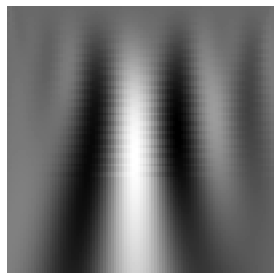

In [68]:
some_cwt = pd.DataFrame(cwt_data_eyes_closed2[5][:10000])
some_cwt_image = some_cwt.values.reshape(100, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [69]:
eyes_open_labels2 = []
eyes_closed_labels2 = []

for cwt_row in cwt_data_eyes_open2:
    eyes_open_labels2.append(False)
for cwt_row in cwt_data_eyes_closed2:
    eyes_closed_labels2.append(True)
    
eyes_open_labels2 = pd.DataFrame(eyes_open_labels2)
eyes_closed_labels2 = pd.DataFrame(eyes_closed_labels2)
eyes_open_labels2

,0
0,False
1,False
2,False
3,False
4,False
...,...
260,False
261,False
262,False
263,False


In [80]:
cwt_data_eyes_open_df2 = pd.DataFrame(cwt_data_eyes_open2)
#cwt_data_eyes_open_df2 = pd.DataFrame(cwt_data_eyes_open2).iloc[:, : 80000]
cwt_data_eyes_closed_df2 = pd.DataFrame(cwt_data_eyes_closed2)

real_data2 = pd.concat([cwt_data_eyes_open_df2, cwt_data_eyes_closed_df2])
real_data_labels2 = pd.concat([eyes_open_labels2, eyes_closed_labels2])

real_data_labels2
real_data2

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,-2.551332e-08,6.263162e-09,7.617749e-08,1.320609e-07,1.369684e-07,9.080374e-08,1.050520e-08,-7.959581e-08,-1.558893e-07,-2.049411e-07,...,-5.343805e-06,-5.526645e-06,-0.000006,-0.000006,-0.000005,-5.165085e-06,-0.000005,-0.000004,-0.000004,-0.000003
1,1.611554e-06,2.884922e-06,5.611853e-07,-4.885622e-07,-5.615197e-07,-4.922729e-07,-4.052543e-07,-3.225445e-07,-2.521375e-07,-2.000453e-07,...,-1.803859e-05,-1.798522e-05,-0.000018,-0.000017,-0.000017,-1.602429e-05,-0.000015,-0.000014,-0.000013,-0.000012
2,-1.641905e-06,-6.948779e-06,-2.604711e-06,-1.647845e-07,2.846249e-07,4.658637e-07,5.929030e-07,6.751628e-07,7.164392e-07,7.153718e-07,...,1.368416e-05,1.637222e-05,0.000019,0.000021,0.000023,2.410123e-05,0.000025,0.000026,0.000026,0.000026
3,1.603583e-06,8.139620e-06,3.668081e-06,1.015847e-06,4.335012e-07,6.137244e-08,-3.153078e-07,-6.826408e-07,-1.013115e-06,-1.275979e-06,...,9.939192e-07,-3.753516e-07,-0.000002,-0.000003,-0.000004,-4.294596e-06,-0.000005,-0.000005,-0.000006,-0.000006
4,-6.876372e-08,2.197852e-06,1.395058e-06,7.868362e-07,6.185481e-07,4.612892e-07,2.608004e-07,1.983998e-08,-2.467756e-07,-5.129714e-07,...,-1.627267e-06,-2.237158e-06,-0.000003,-0.000003,-0.000004,-3.735801e-06,-0.000004,-0.000004,-0.000004,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-8.119821e-07,-2.411525e-06,-3.964080e-07,5.198216e-07,4.669114e-07,2.346334e-07,-1.947787e-08,-2.292233e-07,-3.480781e-07,-3.545362e-07,...,8.661169e-06,6.780586e-06,0.000005,0.000003,0.000001,-2.955970e-07,-0.000002,-0.000003,-0.000005,-0.000006
145,-8.119821e-07,-2.411525e-06,-3.964080e-07,5.198216e-07,4.669114e-07,2.346334e-07,-1.947787e-08,-2.292233e-07,-3.480781e-07,-3.545362e-07,...,8.661169e-06,6.780586e-06,0.000005,0.000003,0.000001,-2.955970e-07,-0.000002,-0.000003,-0.000005,-0.000006
146,-8.119821e-07,-2.411525e-06,-3.964080e-07,5.198216e-07,4.669114e-07,2.346334e-07,-1.947787e-08,-2.292233e-07,-3.480781e-07,-3.545362e-07,...,8.661169e-06,6.780586e-06,0.000005,0.000003,0.000001,-2.955970e-07,-0.000002,-0.000003,-0.000005,-0.000006
147,-8.119821e-07,-2.411525e-06,-3.964080e-07,5.198216e-07,4.669114e-07,2.346334e-07,-1.947787e-08,-2.292233e-07,-3.480781e-07,-3.545362e-07,...,8.661169e-06,6.780586e-06,0.000005,0.000003,0.000001,-2.955970e-07,-0.000002,-0.000003,-0.000005,-0.000006


In [81]:
cwt_data_eyes_open_df2

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,-2.551332e-08,6.263162e-09,7.617749e-08,1.320609e-07,1.369684e-07,9.080374e-08,1.050520e-08,-7.959581e-08,-1.558893e-07,-2.049411e-07,...,-5.343805e-06,-5.526645e-06,-0.000006,-0.000006,-0.000005,-5.165085e-06,-0.000005,-0.000004,-0.000004,-0.000003
1,1.611554e-06,2.884922e-06,5.611853e-07,-4.885622e-07,-5.615197e-07,-4.922729e-07,-4.052543e-07,-3.225445e-07,-2.521375e-07,-2.000453e-07,...,-1.803859e-05,-1.798522e-05,-0.000018,-0.000017,-0.000017,-1.602429e-05,-0.000015,-0.000014,-0.000013,-0.000012
2,-1.641905e-06,-6.948779e-06,-2.604711e-06,-1.647845e-07,2.846249e-07,4.658637e-07,5.929030e-07,6.751628e-07,7.164392e-07,7.153718e-07,...,1.368416e-05,1.637222e-05,0.000019,0.000021,0.000023,2.410123e-05,0.000025,0.000026,0.000026,0.000026
3,1.603583e-06,8.139620e-06,3.668081e-06,1.015847e-06,4.335012e-07,6.137244e-08,-3.153078e-07,-6.826408e-07,-1.013115e-06,-1.275979e-06,...,9.939192e-07,-3.753516e-07,-0.000002,-0.000003,-0.000004,-4.294596e-06,-0.000005,-0.000005,-0.000006,-0.000006
4,-6.876372e-08,2.197852e-06,1.395058e-06,7.868362e-07,6.185481e-07,4.612892e-07,2.608004e-07,1.983998e-08,-2.467756e-07,-5.129714e-07,...,-1.627267e-06,-2.237158e-06,-0.000003,-0.000003,-0.000004,-3.735801e-06,-0.000004,-0.000004,-0.000004,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2.850460e-06,9.133774e-06,3.619885e-06,4.362405e-07,-3.573843e-07,-8.455641e-07,-1.256871e-06,-1.565132e-06,-1.738558e-06,-1.761059e-06,...,2.926978e-05,2.896193e-05,0.000028,0.000027,0.000025,2.313698e-05,0.000021,0.000018,0.000016,0.000013
261,-5.165583e-07,-8.316118e-06,-3.816657e-06,-1.187236e-06,-8.107292e-07,-6.150758e-07,-3.484264e-07,-2.814321e-08,3.148047e-07,6.488849e-07,...,-2.579759e-05,-2.891890e-05,-0.000032,-0.000034,-0.000036,-3.710560e-05,-0.000038,-0.000038,-0.000038,-0.000038
262,-3.940951e-06,-1.158314e-05,-3.786467e-06,7.430413e-07,1.888146e-06,2.364182e-06,2.496834e-06,2.331538e-06,1.946429e-06,1.436239e-06,...,-1.511364e-05,-1.492157e-05,-0.000014,-0.000014,-0.000013,-1.195865e-05,-0.000011,-0.000010,-0.000008,-0.000007
263,2.099848e-07,-1.054759e-06,-8.784624e-07,-6.138395e-07,-4.426948e-07,-2.248736e-07,2.133571e-08,2.453815e-07,3.997536e-07,4.535502e-07,...,-1.404623e-05,-1.607259e-05,-0.000018,-0.000019,-0.000021,-2.181174e-05,-0.000023,-0.000023,-0.000023,-0.000023


In [82]:
cwt_data_eyes_open_df2

,0,1,2,3,4,5,6,7,8,9,...,79990,79991,79992,79993,79994,79995,79996,79997,79998,79999
0,-2.551332e-08,6.263162e-09,7.617749e-08,1.320609e-07,1.369684e-07,9.080374e-08,1.050520e-08,-7.959581e-08,-1.558893e-07,-2.049411e-07,...,-5.343805e-06,-5.526645e-06,-0.000006,-0.000006,-0.000005,-5.165085e-06,-0.000005,-0.000004,-0.000004,-0.000003
1,1.611554e-06,2.884922e-06,5.611853e-07,-4.885622e-07,-5.615197e-07,-4.922729e-07,-4.052543e-07,-3.225445e-07,-2.521375e-07,-2.000453e-07,...,-1.803859e-05,-1.798522e-05,-0.000018,-0.000017,-0.000017,-1.602429e-05,-0.000015,-0.000014,-0.000013,-0.000012
2,-1.641905e-06,-6.948779e-06,-2.604711e-06,-1.647845e-07,2.846249e-07,4.658637e-07,5.929030e-07,6.751628e-07,7.164392e-07,7.153718e-07,...,1.368416e-05,1.637222e-05,0.000019,0.000021,0.000023,2.410123e-05,0.000025,0.000026,0.000026,0.000026
3,1.603583e-06,8.139620e-06,3.668081e-06,1.015847e-06,4.335012e-07,6.137244e-08,-3.153078e-07,-6.826408e-07,-1.013115e-06,-1.275979e-06,...,9.939192e-07,-3.753516e-07,-0.000002,-0.000003,-0.000004,-4.294596e-06,-0.000005,-0.000005,-0.000006,-0.000006
4,-6.876372e-08,2.197852e-06,1.395058e-06,7.868362e-07,6.185481e-07,4.612892e-07,2.608004e-07,1.983998e-08,-2.467756e-07,-5.129714e-07,...,-1.627267e-06,-2.237158e-06,-0.000003,-0.000003,-0.000004,-3.735801e-06,-0.000004,-0.000004,-0.000004,-0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2.850460e-06,9.133774e-06,3.619885e-06,4.362405e-07,-3.573843e-07,-8.455641e-07,-1.256871e-06,-1.565132e-06,-1.738558e-06,-1.761059e-06,...,2.926978e-05,2.896193e-05,0.000028,0.000027,0.000025,2.313698e-05,0.000021,0.000018,0.000016,0.000013
261,-5.165583e-07,-8.316118e-06,-3.816657e-06,-1.187236e-06,-8.107292e-07,-6.150758e-07,-3.484264e-07,-2.814321e-08,3.148047e-07,6.488849e-07,...,-2.579759e-05,-2.891890e-05,-0.000032,-0.000034,-0.000036,-3.710560e-05,-0.000038,-0.000038,-0.000038,-0.000038
262,-3.940951e-06,-1.158314e-05,-3.786467e-06,7.430413e-07,1.888146e-06,2.364182e-06,2.496834e-06,2.331538e-06,1.946429e-06,1.436239e-06,...,-1.511364e-05,-1.492157e-05,-0.000014,-0.000014,-0.000013,-1.195865e-05,-0.000011,-0.000010,-0.000008,-0.000007
263,2.099848e-07,-1.054759e-06,-8.784624e-07,-6.138395e-07,-4.426948e-07,-2.248736e-07,2.133571e-08,2.453815e-07,3.997536e-07,4.535502e-07,...,-1.404623e-05,-1.607259e-05,-0.000018,-0.000019,-0.000021,-2.181174e-05,-0.000023,-0.000023,-0.000023,-0.000023


In [83]:
len(cwt_data_eyes_open2[1])

real_data_labels2

,0
0,False
1,False
2,False
3,False
4,False
...,...
144,True
145,True
146,True
147,True


In [84]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(real_data2, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(real_data_labels2, test_size=0.2, random_state=42)

train_set_labels_eyes_closed = (train_set_labels.values.ravel() == True)
test_set_labels_eyes_closed = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=52)

forest_clf.fit(train_set, train_set_labels_eyes_closed)

RandomForestClassifier(random_state=52)

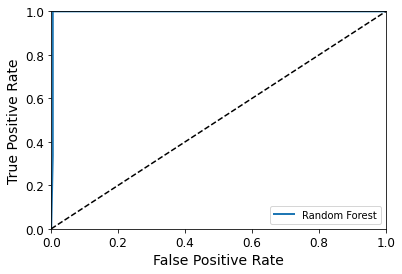

In [85]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)

0.9960757888060885

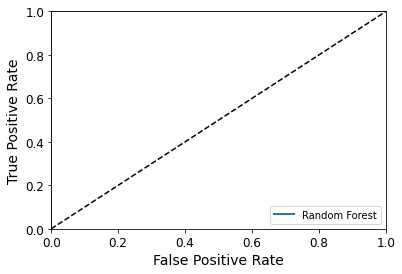

In [50]:
y_probas_forest_test = cross_val_predict(forest_clf, test_set, test_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest_test = y_probas_forest_test[:, 1]   # score = proba of positive class
fpr_forest_test2, tpr_forest_test2, thresholds_forest_test2 = roc_curve(test_set_labels_eyes_closed,y_scores_forest_test)

plot_roc_curve(fpr_forest_test2, tpr_forest_test2, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [51]:
roc_auc_score(test_set_labels_eyes_closed, y_scores_forest_test)

1.0

In [32]:
import joblib

joblib.dump(forest_clf, "eyes_closed_detector_skeptical.pkl")

['eyes_closed_detector_skeptical.pkl']

ValueError: cannot reshape array of size 80000 into shape (100,100)

<Figure size 648x648 with 0 Axes>